In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import curvedsky as cs
import binning

In [2]:
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
from lbxs4.cmb import CMBLensed
from lbxs4.simulations import LBSky
from lbxs4.filtering import Filtering
from lbxs4.multitracer import CoaddKappa
from lbxs4.delensing import Delenser
from lbxs4.config import *

In [4]:
nside = 512
maskpath = os.path.join(MASKDIR, 'LB_Nside2048_fsky_0p8_binary.fits')

In [5]:
cmb = CMBLensed()

In [6]:
dire = '/pscratch/sd/l/lonappan/LBxS4'

In [7]:
sky = LBSky(dire,nside)

In [8]:
filt = Filtering(dire,sky,maskpath)

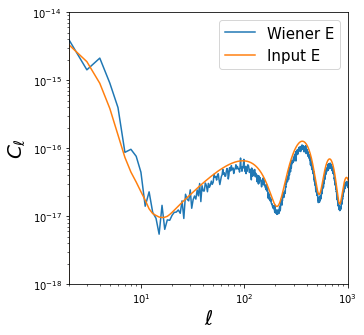

In [136]:
filt.plot_wE(0)

In [30]:
kappa  = CoaddKappa(dire,2,1000,512)

../lbxs4/utils.py:49: RuntimeWarning: invalid value encountered in true_divide
  cls[k][ell[idc]] = cols[i + 1][idc] / we[idc]
../lbxs4/multitracer.py:249: RuntimeWarning: divide by zero encountered in true_divide
  self.INls = np.array( [ 1./self.cov_n[:,:,l].diagonal() for l in range(lmax+1) ] ).T


In [12]:
delens = Delenser(dire,filt,kappa)

In [88]:
lb = delens.lensing_B(0)

In [84]:
B= filt.wiener_B(0)

In [95]:
b1 = cs.utils.alm2cl(1024,lb)
b2 = cs.utils.alm2cl(1024,B[:1025,:1025])
b12 = cs.utils.alm2cl(1024,lb,B[:1025,:1025])

In [104]:
rho = b12/np.sqrt(b1*b2)

/pscratch/sd/l/lonappan/software_pkgs/cmblens/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [105]:
rho[rho<0] = 0.33

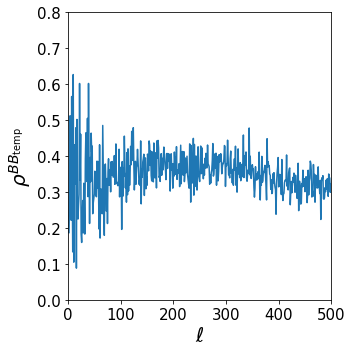

In [120]:
plt.figure(figsize=(5,5))
plt.plot(rho)
plt.xlim(0,500)
plt.ylim(0,0.8)
plt.xlabel(r'$\ell$',fontsize=20)
plt.ylabel(r'$\rho^{BB_\mathrm{temp}}$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('rho_bbtemp.pdf',bbox_inches='tight',dpi=300)



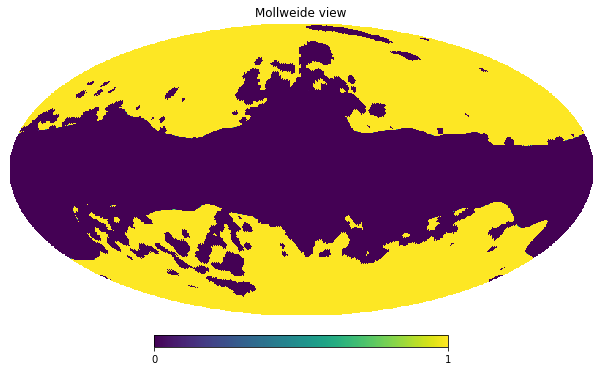

In [138]:
hp.mollview(kappa.masks['cib'])